<center>Заметка 3. 	Бутстреп.</center>
<center>курса <q>Прикладной статистический анализ данных</q>.</center>

<b>Шаг 1: Создание повторных выборок ("псевдовыборок")</b>  

Создаем сотни новых выборок путем сэмплирования объектов с возвращением из исходной случайной выборки. Размер каждой повторной выборки совпадает с исходной случайной выборкой. В результате, каждый объект может встречаться один раз, более одного раза или вообще отсутствовать. 

<b>Шаг 2: Расчёт бутстреп-распределения</b>   

Вычисляется статистика для каждой повторной выборки. Множество полученных статистик образует некоторое выборочное распределение и называется бутстреп-распределением.  

<b>Шаг 3: Применение бутстреп-распределение</b>  

Бутстреп-распределение дает информацию о форме, центре и разбросе выборочного распределения исследуемой статистики. С его помощью можно вычислять доверительные интервалы на данную статистику с произвольным уровнем значимости, а также проверять статистические гипотезы $H_0$, $H_1$.

<b>Основная идея</b>

- Повторные выборки из основной представляют то, что мы получили бы, если бы взяли большое количество выборок из популяции.

- Распределение статистики бутстрепа, основанное на множестве повторных выборок представляет собой выборочное распределение статистики, основанное на множестве истинных выборок.

## Bootstrap standard error

Если интересующая нас статистика является средним значением выборки $\bar{x}$, то стандартная ошибка бутстрепа, основанная на повторных $B$ выборках:

$$SE_{boot,\bar{x}}= \sqrt{\frac{1}{B-1}\sum\bigg(\bar{x}^* - \frac{1}{B}\sum\bar{x}^*\bigg)^2}$$
 
В этом выражении $\bar{x}^*$ представляет собой среднее значение отдельной повторной выборки. Стандартная ошибка бутстрепа -- это обычное стандартное отклонение $B$ значений в $\bar{x}^*$. Звездочка в $\bar{x}^*$ отличает среднее значение повторной выборки от среднего значения $\bar{x}$ исходной выборки.

## Распределение выборки и бутстреп распределение

### 1. Параметрический метод 

Если мы знаем, что объекты из генеральной совокупности распределены нормально, то теория говорит нам, что выборочное распределение их среднего значения $\bar{x}$ также является нормальным.

![Теория](https://user-images.githubusercontent.com/60938140/74949302-a0aa1d80-540e-11ea-8f0c-73b6050fc7fd.png)

### 2. Наивный метод

Берём очень много истинных выборок, считаем среднее значение $\bar{x}$ для каждой истинной выборки и смотрим на распределение этих значений.

![Наивныйметод](https://user-images.githubusercontent.com/60938140/74949346-b28bc080-540e-11ea-86fb-e85f9a878c5a.png)

### 3. Бутстреп

Когда теория не работает, и мы можем позволить себе только одну истинную выборку, то эта истинная выборка заменяет генеральную совокупность. Тогда распределение $\bar{x}$ рассчитанное по множеству "псевдовыборок" заменяет распределение выборки.

![Бутстреп](https://user-images.githubusercontent.com/60938140/74949363-b91a3800-540e-11ea-8175-f1606d751cea.png)

# Расходы покупателей

Имеются размеры сумм в долларах, потраченных 50 покупателями в супермаркете. Мы готовы рассматривать это как SRS (Simple Random Sample) всех покупателей на этом рынке.     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import *
from tqdm.notebook import tqdm

spending = np.array([3.11, 8.88, 9.26, 10.81, 12.69, 13.78, 15.23, 15.62, 17.00, 17.39,
                    18.36, 18.43, 19.27, 19.50, 19.54, 20.16, 20.59, 22.22, 23.04, 24.47,
                    24.58, 25.13, 26.24, 26.26, 27.65, 28.06, 28.08, 28.38, 32.03, 34.98,
                    36.37, 38.64, 39.16, 41.02, 42.97, 44.08, 44.67, 45.40, 46.69, 48.65,
                    50.39, 52.75, 54.80, 59.07, 61.22, 70.32, 82.70, 85.76, 86.37, 93.34])

RANDOM_SEED = 78146
np.random.seed(RANDOM_SEED)

1. Составьте гистограмму данных. Распределение слегка искажено. Является ли оно нормальным?

In [2]:
def check_norm(X):
    sns.distplot(X)
    plt.plot(sorted(X), norm(X.mean(), np.std(X)).pdf(sorted(X)))
    plt.show()
    qqplot(X, line='s', fit=True)
    plt.show()
    print(f"Mean:\t{X.mean()}")
    print(f"Standard deviataion:\t{np.std(X)}")
    print(f"Variance:\t{np.var(X)}")

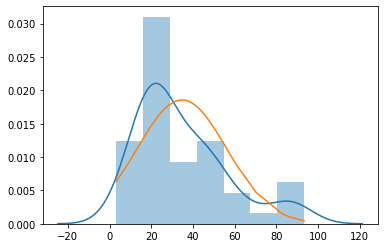

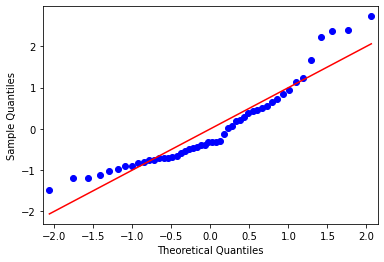

Mean:	34.7022
Standard deviataion:	21.479328601238915
Variance:	461.3615571600001


In [3]:
check_norm(spending)

Не является нормальным

2. Центральная предельная теорема говорит, что средние значения выборок будут группироваться вблизи среднего значения совокупности более плотно по мере увеличения размера каждой выборки. Рассчитайте бутстреп-распределение $\mu$, среднего значения выборки, постройте его гистограмму. Найдите среднее значение полученного распределения и сравните его со средним исходной выборки.

In [4]:
M = 100000
Xs = np.random.choice(spending, size=(M, len(spending)), replace=True)
mus = Xs.mean(axis=1)

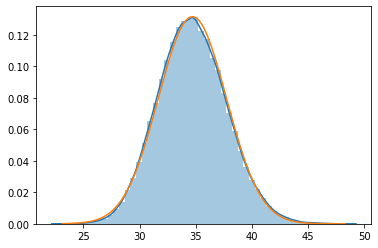

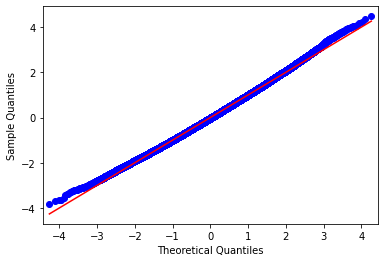

Mean:	34.694608238
Standard deviataion:	3.035028123169032
Variance:	9.211395708426936


In [5]:
check_norm(mus)

Среднее совпадает с исходной выборкой

3. Рассчитайте бутстреп-распределение $\sigma$, стандартного отклонения выборки, постройте его гистограмму. Найдите среднее значение полученного бутстреп-распределения и сравните его со стандартным отклонением исходной выборки.

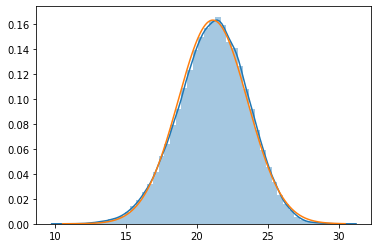

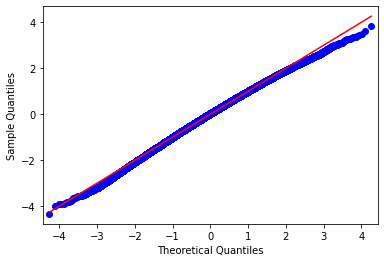

Mean:	21.11959696592683
Standard deviataion:	2.4401075300711614
Variance:	5.954124758309985


In [6]:
check_norm(np.std(Xs, axis=1))

Стандратное отклонение немного ниже, чем в исходной выборке

4. Рассчитайте бутстреп-распределение $\sigma^2$, дисперсии выборки, постройте его гистограмму. Найдите среднее значение полученного бутстреп-распределения и сравните его с дисперсией исходной выборки.

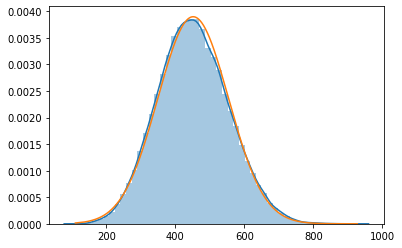

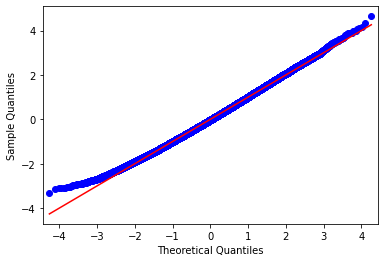

Mean:	451.9915007614957
Standard deviataion:	102.3326393475235
Variance:	10471.969075830315


In [7]:
check_norm(np.var(Xs, axis=1))

Дисперсия немного ниже, чем в исходной выборке

5. Сравните стандартные ошибки. У нас есть два способа оценить стандартное отклонение среднего значения выборки $\bar{x}$: использовать формулу $s\big/\sqrt{n}$ для стандартной ошибки или использовать bootstrap standard error. Найдите стандартное отклонение выборки $s$ и используйте его, чтобы найти стандартную ошибку $s\big/\sqrt{n}$ среднего значения выборки. Насколько ваш результат согласуется с bootstrap standard error?

In [8]:
print(f"Standard error: {np.std(spending, ddof=1) / np.sqrt(len(spending))}")
print(f"Bootstrap standard error: {np.std(Xs.mean(axis=1), ddof=1)}")

Standard error: 3.068475514462702
Bootstrap standard error: 3.035043298423462


## Доверительный интервал

Вспомним односторонний доверительный интервал для среднего значения нормально распределеной совокупности:

$$\bar{x} \pm t^* \frac{s}{\sqrt{n}}$$

Этот интервал основан на нормальном распределении выборки со средним значением выборки $x$ и формулой для стандартной ошибки выборки $x$. Когда бутстреп распределение приблизительно нормальное и имеет небольшое смещение, мы можем использовать ту же самую формулу со стандартной ошибкой бутстрепа, чтобы получить доверительный интервал для любого параметра. 

Предположим, что бутстреп распределение статистики из SRS размера $n$ приблизительно нормально и мало смещено. Тогда аппроксимация доверительного интервала на любую статистику вычисляется через бутстреп:

$$statistic \pm t^*SE_{boot,statistic}$$

где $t^*$ - критическое значение $t(n-1)$ распределения с площадью между $-t^*$ и $t^*$.

6. Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках" по формуле выше.

In [9]:
alpha = 5e-2

7. Второй вариант: оставьте 95% ваших наблюдений. Для этого от полученного бутстреп-распределения отсеките хвосты с помощью `np.linspace` (равномерный носитель), сравните эти результаты с доверительным интервалом, полученным в шестом пункте задания.

8. Также найдите стандартный односторонний доверительный интервал. Он отличается от двухстороннего только используемыми стандартными ошибками. Насколько похожи интервалы?